In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
def plot_cross_section(y, xlim):
    fig, ax = plt.subplots(3)
    ax[0].hist(y[50, :], bins=50)
    ax[0].set_title(f'T={timestep[50]}')
    ax[0].set_xlim(xlim)

    ax[1].hist(y[125, :], bins=50)
    ax[1].set_title(f'T={timestep[125]}')
    ax[1].set_xlim(xlim)

    ax[2].hist(y[-1, :], bins=50)
    ax[2].set_title(f'T={timestep[-1]}')
    ax[2].set_xlim(xlim)

    plt.tight_layout()
    plt.show()

In [10]:
# number of simulated paths
nsims = 10000

# time to maturity (expiry)
expiry = 1 

# number of steps
nsteps = 250

(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

### Brownian Motion

In [11]:
# simulate increments of the BM setting
dW = np.random.randn(nsims, nsteps) * (dt ** 0.5)

# simulate Wiener process
# cumulative sum of the increments
cdW = np.concatenate([np.zeros([1, nsims]), np.cumsum(dW,1).T])

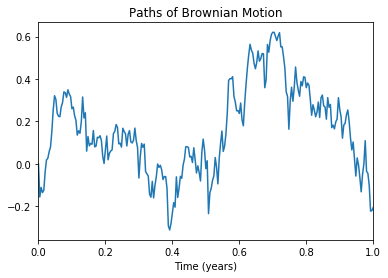

In [316]:
plt.plot(timestep, cdW[:, 1])
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Brownian Motion')
plt.show()

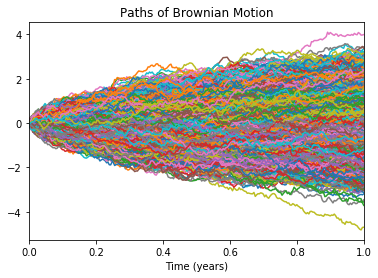

In [12]:
plt.plot(timestep, cdW)
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Brownian Motion')
plt.show()

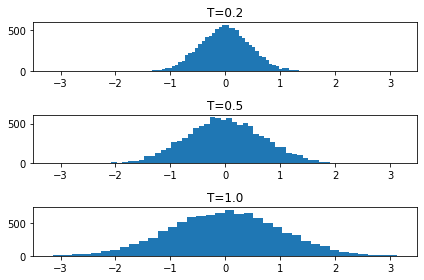

In [13]:
plot_cross_section(cdW, xlim=[-3.5, 3.5])

### Arithmetic Brownian Motion

In [14]:
nsims = 10000
expiry = 1 
nsteps = 250
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model parameters
mu = 0.2
sigma = 0.3

In [15]:
dX = mu*dt + sigma*np.random.randn(nsims, nsteps) * (dt ** .5)
cdX = np.concatenate([np.zeros([1, nsims]), np.cumsum(dX,1).T])

# Expected Value
EcdX = timestep*mu

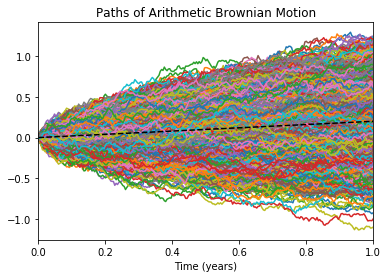

In [16]:
plt.plot(timestep, cdX)
plt.plot(timestep, EcdX, '--k')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Arithmetic Brownian Motion')
plt.show()

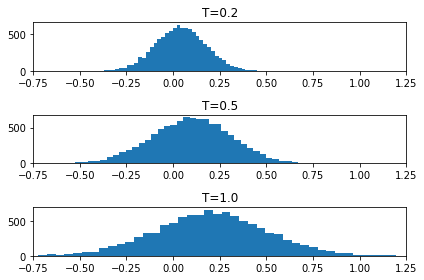

In [17]:
plot_cross_section(cdX, xlim=[-.75, 1.25])

### Geometric Brownian Motion

In [18]:
nsims = 10000
expiry = 1 
nsteps = 250
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model parameters
mu = 0.2
sigma = 0.3

In [19]:
# ABM
dX = mu*dt + sigma*np.random.randn(nsims, nsteps) * dt ** 0.5
# either cumsum and raise e to the power of the result
cdX = np.concatenate([np.zeros([1, nsims]), np.cumsum(dX,1).T])
gbm1 = np.exp(cdX)
# or add 1 to dX and cumprod
gbm2 = np.concatenate([np.zeros([1, nsims]), np.cumprod(1+dX,1).T])
# Expected Value
EcdX = np.exp(timestep*mu)

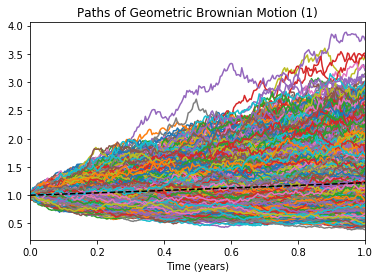

In [20]:
plt.plot(timestep, gbm1)
plt.plot(timestep, EcdX, '--k')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Geometric Brownian Motion (1)')
plt.show()

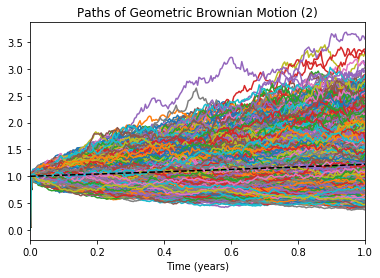

In [21]:
plt.plot(timestep, gbm2)
plt.plot(timestep, EcdX, '--k')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Geometric Brownian Motion (2)')
plt.show()

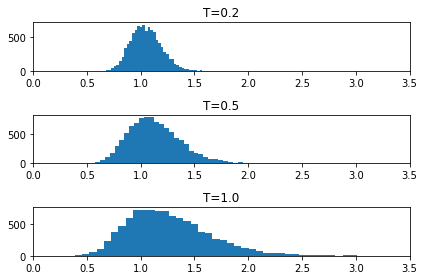

In [22]:
plot_cross_section(gbm1, xlim=[0,3.5])

### Mean-Reverting Processes

In [23]:
nsims = 10000
expiry = 10
nsteps = 100
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model params
mu = 100
alpha = 1
X0 = 100
X1 = 120
X2 = 80

In [24]:
sl1 = mu + (X0-mu) * np.exp(-alpha*timestep)
sl2 = mu + (X1-mu) * np.exp(-alpha*timestep)
sl3 = mu + (X2-mu) * np.exp(-alpha*timestep)

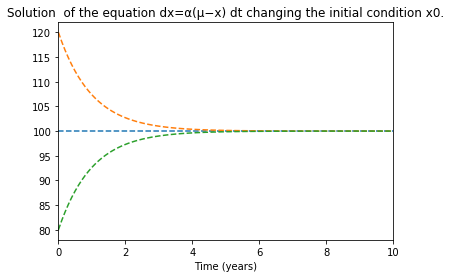

In [25]:
plt.plot(timestep, sl1, '--')
plt.plot(timestep, sl2, '--')
plt.plot(timestep, sl3, '--')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title(r'Solution  of the equation dx=α(μ−x) dt changing the initial condition x0.')
plt.show()

### Vasicek Model

In [176]:
nsims = 1000
expiry = 1
nsteps = 250
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model params 
r0 = 0.04
alpha = 0.8
mu = 0.09
sigma = 0.05

In [177]:
# compute the variance of the increments
vol2 = (1-np.exp(-2*alpha*dt)) / (2*alpha)
paths = np.empty([0, nsteps+1]) # very important for vstack to work
for j in range(nsims):
    # initialise interest rate vector
    r = np.zeros(nsteps+1)
    r[0] = r0
    # simulate increments
    dW = np.random.randn(nsteps)*vol2**0.5
    # start iteration
    for i in range(nsteps):
        r[i+1] = mu+np.exp(-alpha*dt)*(r[i]-mu)+sigma*dW[i]
    # store simulated path
    paths = np.vstack([rail, r])

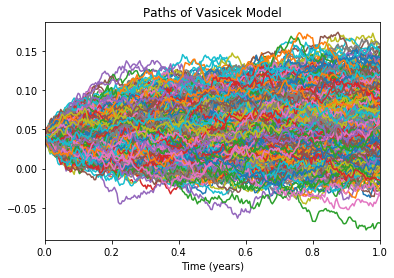

In [178]:
plt.plot(timestep, paths.T)
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of Vasicek Model')
plt.show()

#### Vasicek Densities at different time horizons

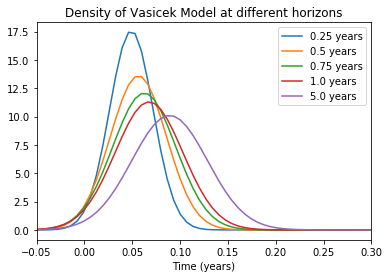

In [179]:
horizon = np.array([0.25, 0.5, 0.75, 1, 5])
meanVas = mu + np.exp(-alpha*horizon) * (r0-mu)
varVas = sigma*sigma*(1-np.exp(-2*alpha*horizon))/ (2*alpha)
x = np.linspace(mu-3*sigma**0.5, mu+3*sigma**0.5, 200)

pdfV = np.empty([0, x.size])
for i, h in enumerate(horizon):
    meanV = meanVas[i]
    stdV = varVas[i] ** 0.5
    pdfVas = stats.norm(meanV, stdV).pdf(x)
    pdfV = np.vstack([pdfV, pdfVas])


plt.plot(x, pdfV.T)
plt.xlim([-0.05, 0.3])
plt.title('Density of Vasicek Model at different horizons')
plt.legend([f"{x} years" for x in horizon])
plt.show()

### Ornstein-Uhlenbeck process
dX = alpha*(mu-X)*dt + sigma*dW

In [ ]:
nsims = 2000
expiry = 1
nsteps = 250
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model params 
alpha = 5
mu = 0.07
sigma = 0.07

# initial value
X0 = 0.03

In [312]:
# initialise simulated paths
paths = np.zeros([nsims, nsteps+1])
paths[:, 0] = paths[:, 0] + X0
normal = np.random.randn(nsims, nsteps+1)


# Compute the standard deviation for a time step
# plain Euler
# sdev = sigma*np.sqrt(dt)

# Euler with analytic moments
sdev = sigma*np.sqrt((1-np.exp(-2*alpha*dt))/(2*alpha))

# start iteration
for i in range(nsteps):
    # palin euler
    # paths[:, i+1] = paths[:, i] + alpha*(mu-paths[:, i])*dt + sdev* normal[:, i]
    paths[:, i+1] = mu+(paths[:, i]-mu)*np.exp(-alpha*dt) + sdev*normal[:, i]

# Calculate Exxpectation
EX = mu + (X0-mu)*np.exp(-alpha*timestep)

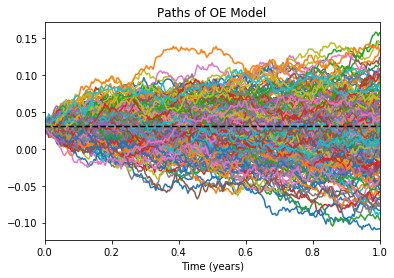

In [313]:
plt.plot(timestep, paths.T)
plt.plot(timestep, EX, '--k')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of OE Model')
plt.show()

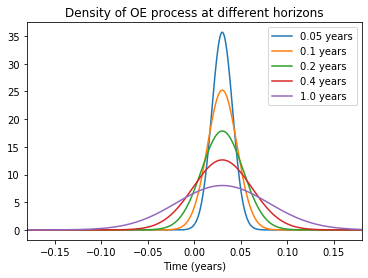

In [311]:
horizon = np.array([0.05, 0.1, 0.2, 0.4, 1])
x = np.linspace(-0.18,0.18, 1000)
EX2 = mu+(X0-mu)*np.exp(-alpha*horizon)
sdev = sigma*np.sqrt((1-np.exp(-2*alpha*horizon))/(2*alpha))
f = np.zeros([len(x),len(horizon)])

for i, h in enumerate(horizon):
    f[:, i] = stats.norm.pdf(x, EX2[i], sdev[i])


plt.plot(x, f)
plt.xlim([-0.18,0.18])
plt.title('Density of OE process at different horizons')
plt.legend([f"{x} years" for x in horizon])
plt.show()

### Cox-Ingersoll-Ross process

In [230]:
nsims = 200
expiry = 1
nsteps = 250
(timestep, dt) = np.linspace(0, expiry, nsteps+1, retstep=True)

# model params 
alpha = 5
mu = 0.07
sigma = 0.265

# initial value
X0 = 0.03

In [245]:
# initialise simulated paths
paths = np.zeros([nsims, nsteps+1])
paths[:, 0] = paths[:, 0] + X0
normal = np.random.randn(nsims, nsteps+1)

# Degrees of freedom of the non-central chi square distribution
d = 4*alpha*mu/sigma**2;
# non-centrality parameter
nc = lambda x: 4*alpha*x/(sigma**2*(np.exp(alpha*dt)-1)); 

# Compute and accumulate the increments
# Euler with analytic moments
a = sigma**2/alpha*(np.exp(-alpha*dt)-np.exp(-2*alpha*dt))
# Euler with analytic moments
b = mu*sigma**2/(2*alpha)*(1-np.exp(-alpha*dt))**2
# exact method
k = sigma**2*(1-np.exp(-alpha*dt))/(4*alpha) 


# start iteration
for i in range(nsteps):
    # palin euler
    # paths[:, i+1] = paths[:, i]+ alpha * (mu-paths[:, i])*dt + sigma*np.sqrt(paths[:, i]*dt)* normal[:, i]
    
    # Euler with analytic moments (FAST)
    # https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method
    paths[:, i+1] = mu+(paths[:, i]-mu)*np.exp(-alpha*dt) + np.sqrt(a*paths[:, i]+b) * normal[:, i]
    
    # exact method
    # paths[:, i+1] = stats.ncx2.ppf(np.random.rand(nsims),d,nc(paths[:, i]))*k; 
# Calculate Exxpectation
EX = mu + (X0-mu)*np.exp(-alpha*timestep)

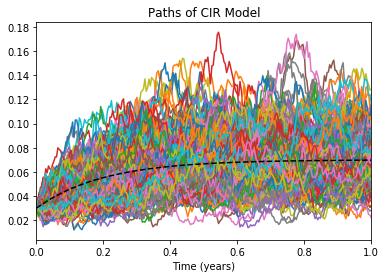

In [246]:
plt.plot(timestep, paths.T)
plt.plot(timestep, EX, '--k')
plt.xlim([0, expiry])
plt.xlabel('Time (years)')
plt.title('Paths of CIR Model')
plt.show()

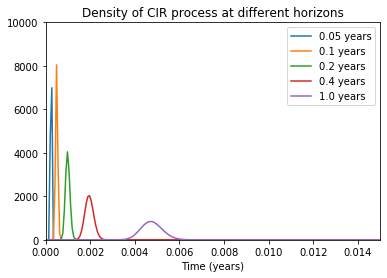

In [273]:
horizon = np.array([0.05, 0.1, 0.2, 0.4, 1])
sdevinfty = sigma*np.sqrt(mu/(2*alpha));
x = np.linspace(0, mu+4*sdevinfty, 1000)
k = sigma**2*(1-np.exp(-alpha*horizon))/(4*alpha) 
d = 4*alpha*mu/sigma**2;
f = np.zeros([len(x), len(horizon)])

for i, h in enumerate(horizon):
    f[:, i] = stats.ncx2.pdf(x/k[i], d, nc(f[:,i]))/k[i]


plt.plot(x, f)
plt.xlim([0, .015])
plt.ylim([0, 1e4])
plt.title('Density of CIR process at different horizons')
plt.legend([f"{x} years" for x in horizon])
plt.show()

## Stochastic Volatility

### Brownian Bridge

The primary use for the Brownian bridge in finance is as an aid to Monte Carlo simulation, since the Brownian bridge X(t) represents a Brownian motion on the time interval \[s,T\] starting at 
Ws = a and conditioned to arrive at b at time T.

### Heston Model

## Stochastic Processes with Jumps

### Poisson Process

### Gamma Process

### Merton Jump Diffusion Process

### Kou Process

### Variance Gamma Process